# Coronavirus 
___
Coronavirus COVID-19 (2019-nCoV)  
COVID-19 Data for South Africa
### About Notebook
The goal here is to explore data for Coronavirus spread in South Africa, this notebook will be updated as time goes, Site to know more about Coronavirus https://www.who.int/health-topics/coronavirus

___
### Load Packages
Let's load packages that we need to achieve the goal above

In [1]:
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scripts import graphs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_colwidth = 100

### Data 
___
Let's check the data, we may have multiple files in the data directory 

In [2]:
os.listdir('../data')

['LICENSE.md',
 'covid19za_timeline_confirmed.csv',
 'covid19za_timeline_transmission_type.csv',
 'covid19za_timeline_deaths.csv',
 'health_system_za_public_hospitals.csv',
 'README.md',
 'health_system_za_public_hospitals_contacts.csv',
 'health_system_za_public_hospitals_extended_details.csv',
 'covid19za_travel_locations_coordinates.csv',
 'covid19za_timeline_testing.csv']

We have one CSV file that the data, let's use this data

### Load data
___
Let's load data 

In [3]:
df = pd.read_csv('../data/covid19za_timeline_confirmed.csv')
df_tests = pd.read_csv('../data/covid19za_timeline_testing.csv')
df_travel = pd.read_csv('../data/covid19za_travel_locations_coordinates.csv')

### Partial View of Data
___
Let's see how the data is formatted

In [4]:
df.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type
0,1,05-03-2020,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy
1,2,07-03-2020,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy
2,3,08-03-2020,20200308,South Africa,KZN,ZA-KZN,NaN,female,Travelled to Italy
3,4,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy
4,5,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy


### Conversion 
___
Let's convert data to the correct data type, we will only convert `date` at the moment, Age has missing values so that cannot be converted at the moment 

In [5]:
df['date'] = df.apply(lambda x: datetime.strptime(x['date'], '%d-%m-%Y').date(), axis=1)
df_tests['date'] = df_tests.apply(lambda x: datetime.strptime(x['date'], '%d-%m-%Y').date(), axis=1)

### Age Group
___
Let's create age group column to use it for further analysis
### <span style='color:green'> Note:</span>  
    Fixed bins for age less than 20 it was skipping the ages  

In [6]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df.age, bins, labels = labels, include_lowest = True)

### Visualizations
___
Graphs are better to use and explain, let's viusalize our data

In [7]:
df.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,age_group
0,1,2020-03-05,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,30-39
1,2,2020-03-07,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,30-39
2,3,2020-03-08,20200308,South Africa,KZN,ZA-KZN,NaN,female,Travelled to Italy,NaN
3,4,2020-03-09,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,30-39
4,5,2020-03-09,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,30-39


___
### Age group 
Let's see age groups that infected by Coronavirus

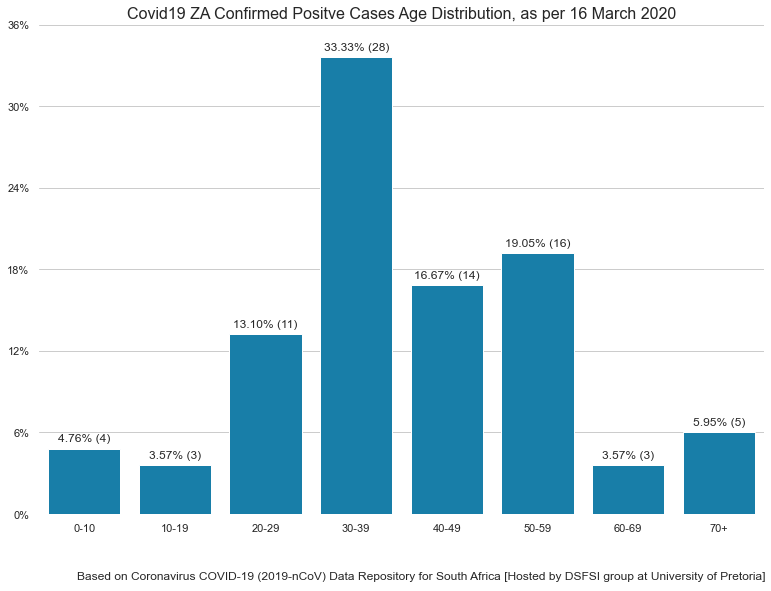

In [8]:
graphs.vertical_bar_chart(df['age_group'].value_counts().reset_index(), 'index', 'age_group', 'Age distribution', 
                          'index')
plt.title("Covid19 ZA Confirmed Positve Cases Age Distribution, as per 16 March 2020", fontsize=16)
plt.annotate('Based on Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa [Hosted by DSFSI group at University of Pretoria]', 
             (0.1, 0.02), xycoords='figure fraction', fontsize=12)
plt.savefig("../visualisation/age_distribution_confirmed_cases.png", 
#                bbox_inches='tight', 
               transparent=True,
               pad_inches=0, dpi = 200)

#### Coronavirus infection
The Age group that is mostly infected is between **30 - 39**, note that from between age of **20 - 59** it is about **~83%** infected

___
### Daily infections
Let's See how the virus is spreading by day

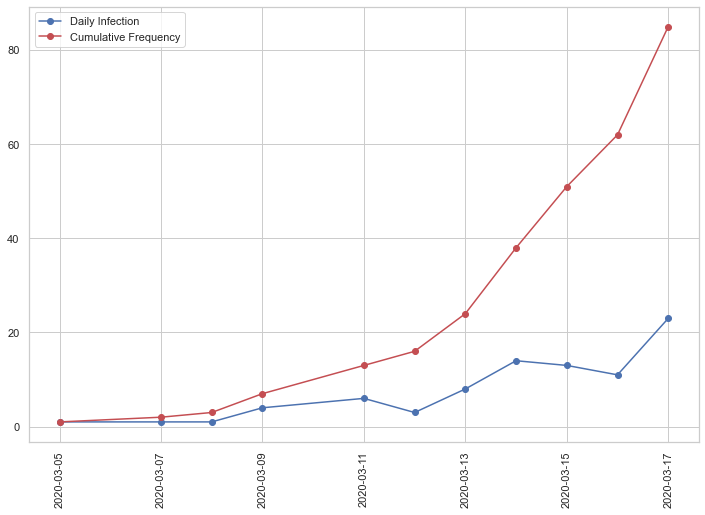

In [9]:
graphs.line_graph(df, 'date')

### Testing
Cummulative number of people testing Coronavirus Daily

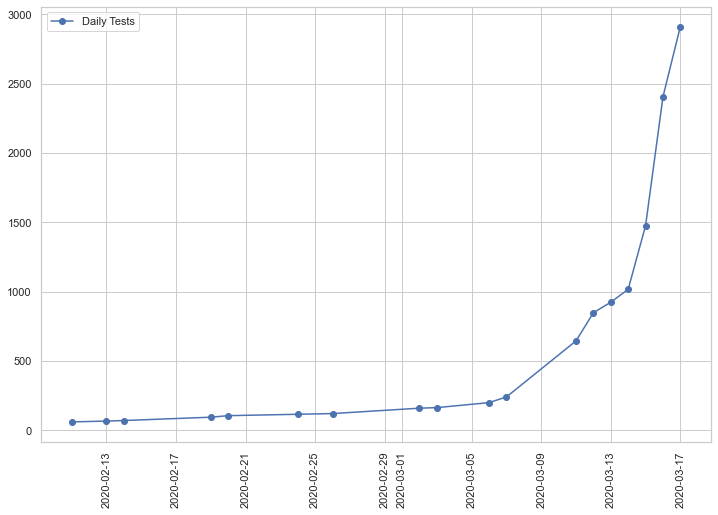

In [10]:
graphs.general_line_graph(df_tests, 'date', 'cumulative_tests')

### Gender
Let's see which gender has more 

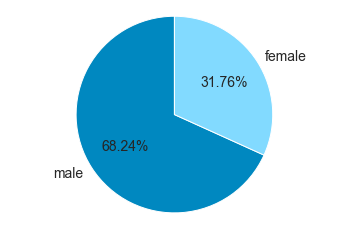

In [11]:
graphs.pie_chart(df, 'gender')

**~68%** of infected individuals are Males and **~32%** are Females
___

### Province 
Lets see provinces that are affected by Coronavirus

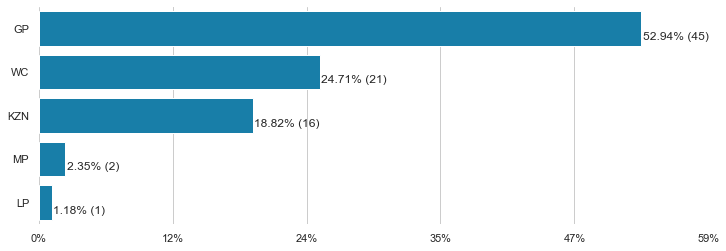

In [12]:
graphs.horizontal_bar_chart(df['province'].value_counts().reset_index(), 'province', 'index', 'Province', 
                            figsize=(12, 4))

**Gauteng** is leading in terms of reported cases, that makes sense since lot of people are using OR Tambo International Airpot
___

### Country 
Let's see which country they travel for before coming to South Africa

In [13]:
df['transmission_type'] = df['transmission_type'].apply(lambda x: 
                              x.replace('Travelled to ', '')\
                              .replace(' and', ';')\
                              .replace('Visiting resident of ', '')\
                              .replace(' travelled to', ';'))

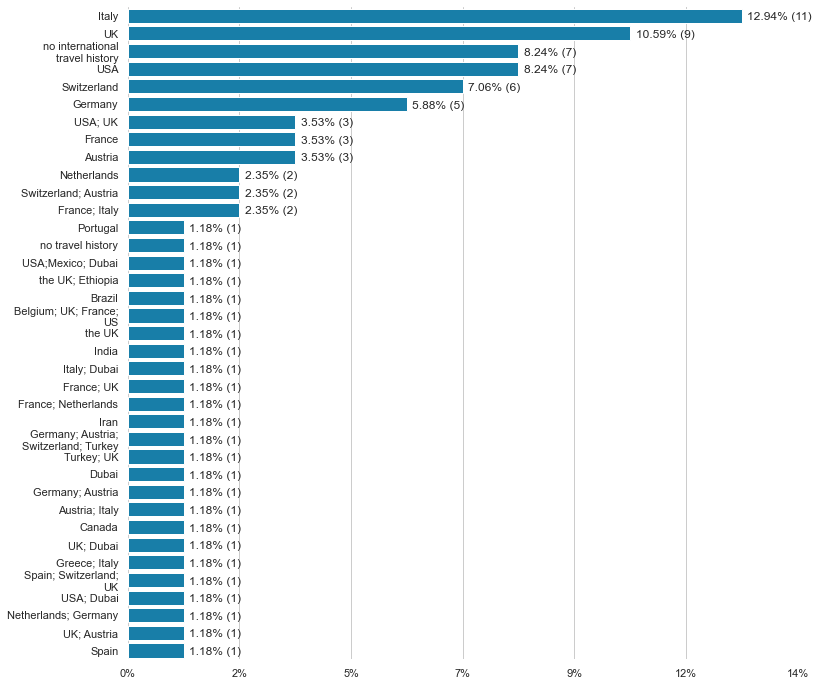

In [14]:
graphs.horizontal_bar_chart(df['transmission_type'].value_counts().reset_index(), 'transmission_type', 
                     'index', 'Country', figsize=(12, 12))

### Note
Lot of people seems like they got infected by a virus in Itali, It seems like they pass through Italy first  and there is also lot of interactions happens in Itali and Austria
___

## Netwok for pathways
Lets plot the network path for their trips

In [15]:
path = []
path_route = []
for index, row in df.iterrows():
    if ';' in row['transmission_type']:
        path_route.append([row['transmission_type'].split('; '),  row['province']])
    elif (row['transmission_type'] !='no travel history') and (row['transmission_type'] !='no international travel history'):
        row['transmission_type'] = row['transmission_type'].replace('the ', '')
        path.append({
    'Source': row['transmission_type'],'Dest': row['province'],
    'Source_Lat': df_travel[df_travel.country_or_province_travelled==row['transmission_type']].latitude.values[0], 
    'Source_Lon': df_travel[df_travel.country_or_province_travelled==row['transmission_type']].longitude.values[0],
    'Dest_Lat': df_travel[df_travel.country_or_province_travelled==row['province']].latitude.values[0],
    'Dest_Lon': df_travel[df_travel.country_or_province_travelled==row['province']].longitude.values[0]
            })

In [16]:
travel = pd.DataFrame(path)

In [17]:
colors = ['yellow', 'red', 'cyan', 'magenta', 'green', 
  'orange', 'maroon', 'pink', 'brown', 'black', 
  'white', 'blue', 'yellow', 'pink', 'black']

### Global infections
#### Direct Travels 
Global infections of Coronavirus to South Africa

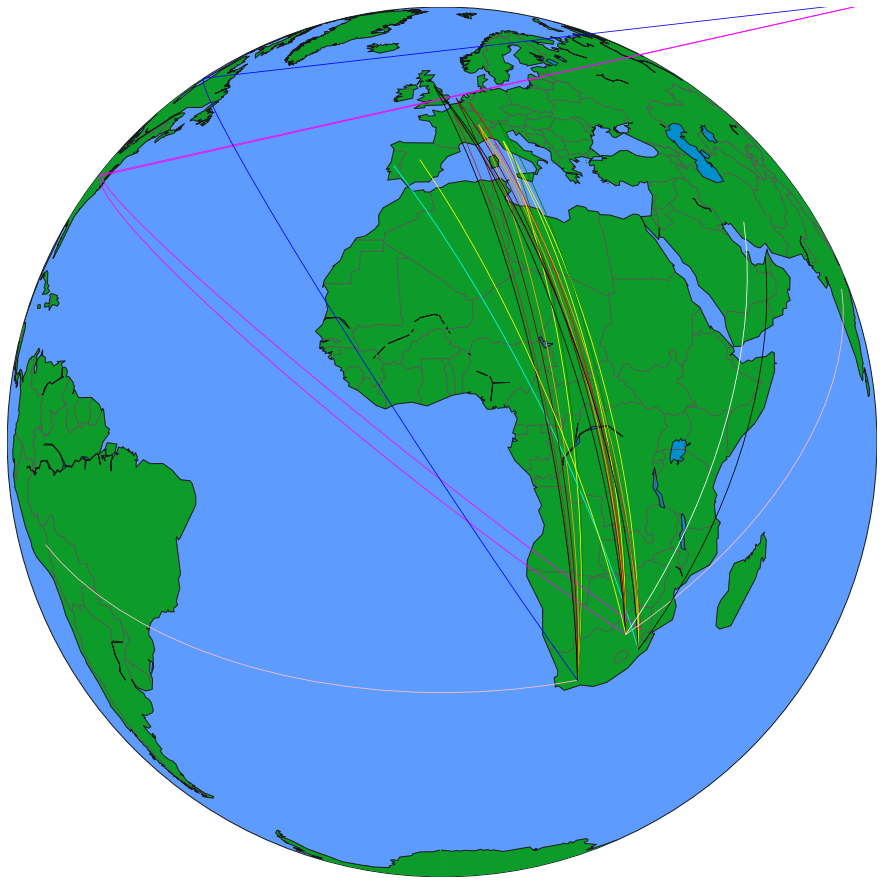

In [18]:
graphs.globe(travel, colors)

### Flat Structure 
#### Direct Travels 

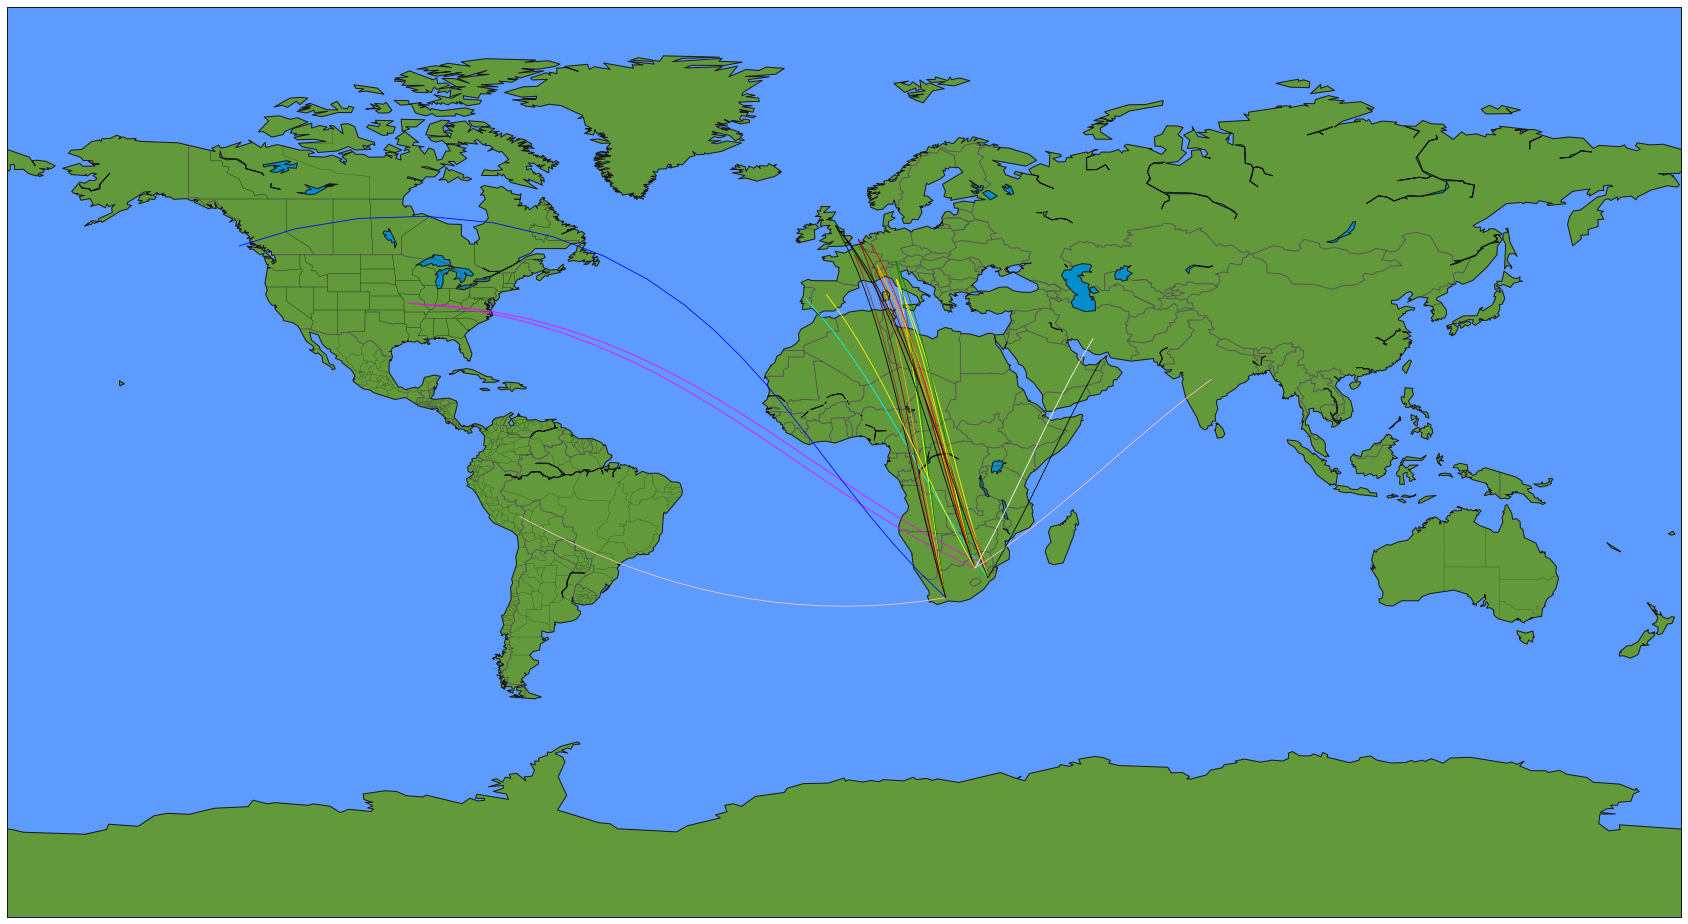

In [19]:
graphs.flat_globe(travel, colors)

# Multple Route to South Africa
This is mutiple routes travel to South Africa (In Progress)

In [24]:
#set(path_route)

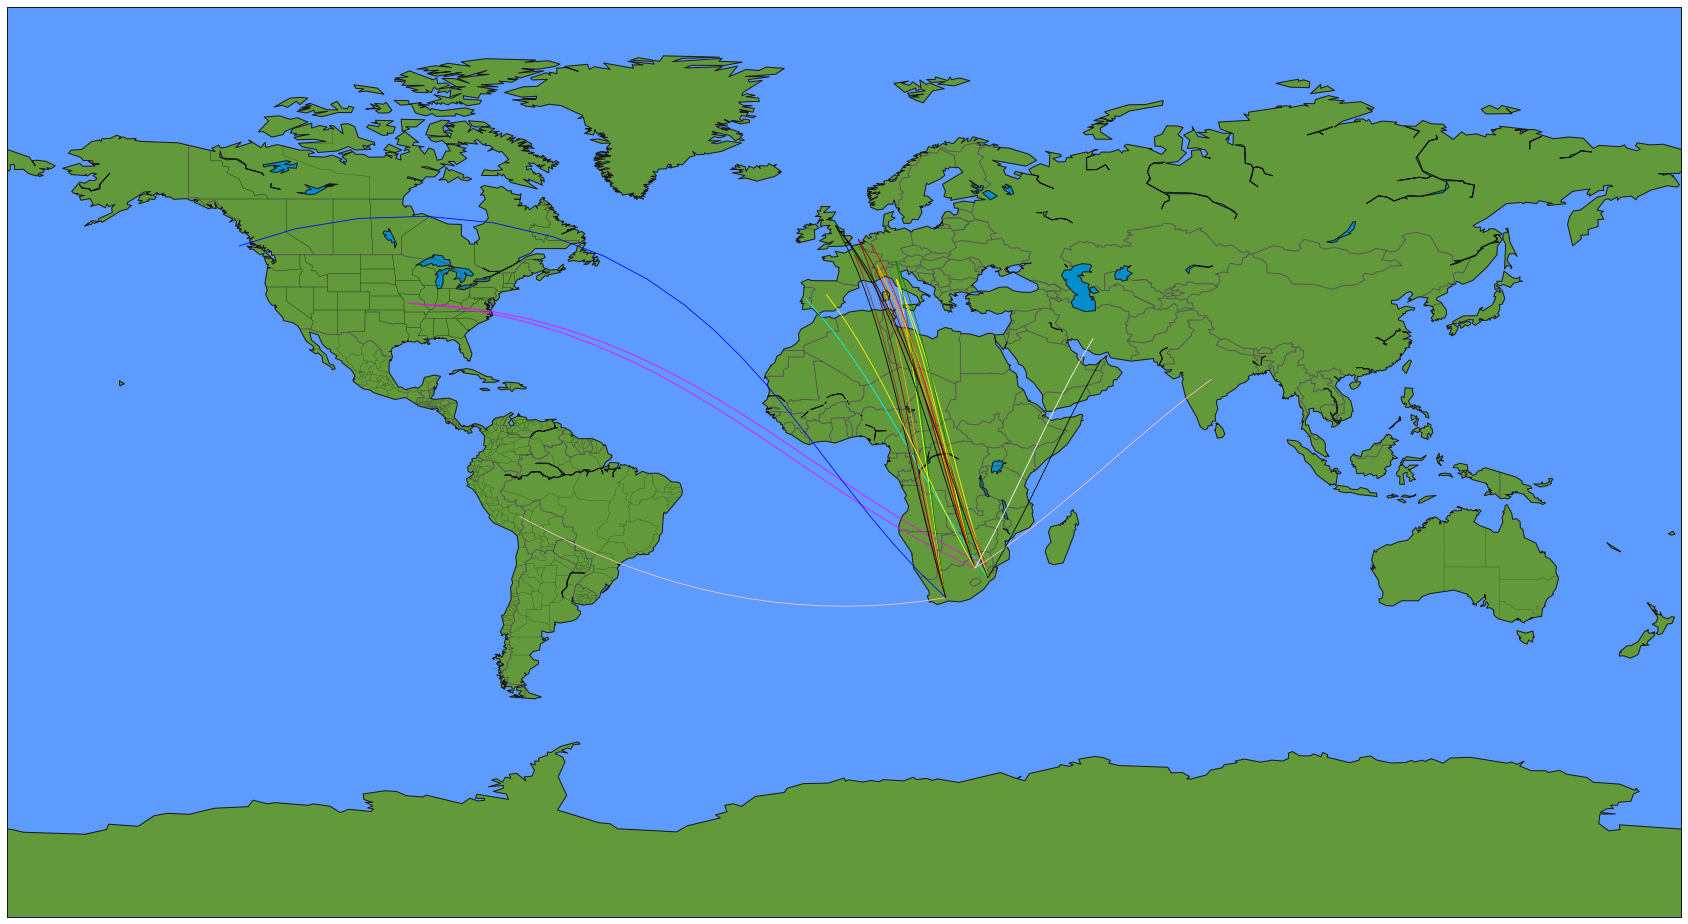

In [25]:
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
plt.figure(figsize = (30,30))
m = Basemap(projection='gall')
m.fillcontinents(color="#61993b",lake_color="#008ECC")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
countries = list(travel.Source.unique())
for item in countries:
    for index, row in travel[travel.Source == item].drop_duplicates().iterrows():
        x2, y2 = m.gcpoints( row["Source_Lat"], row["Source_Lon"], row["Dest_Lat"], row["Dest_Lon"], 20)
        plt.plot(x2,y2,color=colors[countries.index(item)],linewidth=0.8)
plt.show()